## Проект: разработка модели МО для предсказания покупательской активности и разработка рекомендаций по её повышению

### Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Этапы проведения работы

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

### Данные, используемые в работе

#### файл market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### файл market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.

#### файл market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.

#### файл money.csv

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.

## Загрузка библиотек и функций

In [1]:
!pip install phik -q
!pip install shap -q
!pip install scikit-learn==1.1.0 -q
!pip install matplotlib==3.5.1 -q

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, accuracy_score

import shap

In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
def info(df):
    """Функция показывает в датафрейме:
    1. информацию о типах данных;
    2. долю пропущенных значений;
    3. количество дубликатов"""
    
    print('-'*100)
    df.info()
    print('-'*100)
    print(f"пропущенные значения: \n{df.isna().mean()}")
    print('-'*100)
    print(f"Количество дубликатов: \n{df.duplicated().sum()}")
    print('-'*100)
    
def plot_object(df):
    """Функция строит графики, отображающие количество наблюдений для каждого категориального признака"""
    
    for col in df.select_dtypes(include='object'):
        ax = sns.countplot(data=df, y=col)
        plt.show()

def plot_hist(df):
    """Функция строит гистограммы для числовых признаков (за исключение столбца id)"""
    
    df.drop(columns='id').select_dtypes(exclude='object').hist(figsize=(12, 12))
    
def standard_columns(df):
    """Функция приводит названия столбцов датафрейма в стандартный вид:
    1. строчные буквы;
    2. '_' вместо пробелов"""
    
    df.columns = df.columns.map(lambda x: x.lower().replace(' ', '_'))
    return df

In [5]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.75

## Загрузка данных 

**market_file.csv** - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

In [6]:
market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
market_file = standard_columns(market_file)
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


**market_money.csv** - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

In [7]:
market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
market_money = standard_columns(market_money)
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


**market_time.csv** - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

In [8]:
market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
market_time = standard_columns(market_time)
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


**money.csv** - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

In [9]:
money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')
money = standard_columns(money)
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


## Предобработка данных

### market_file

In [10]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [11]:
info(market_file)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  


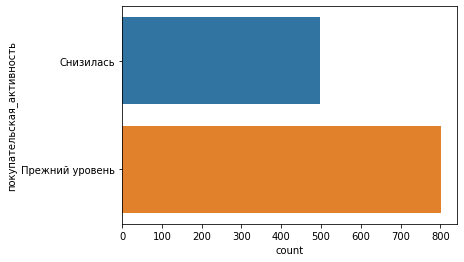

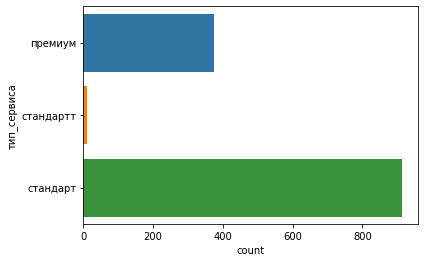

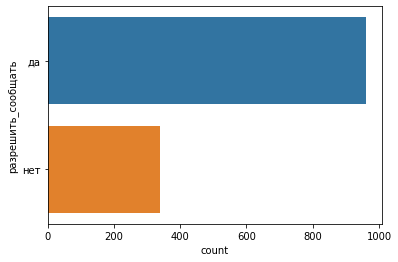

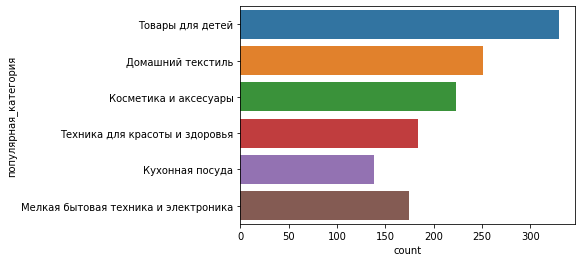

In [12]:
plot_object(market_file)

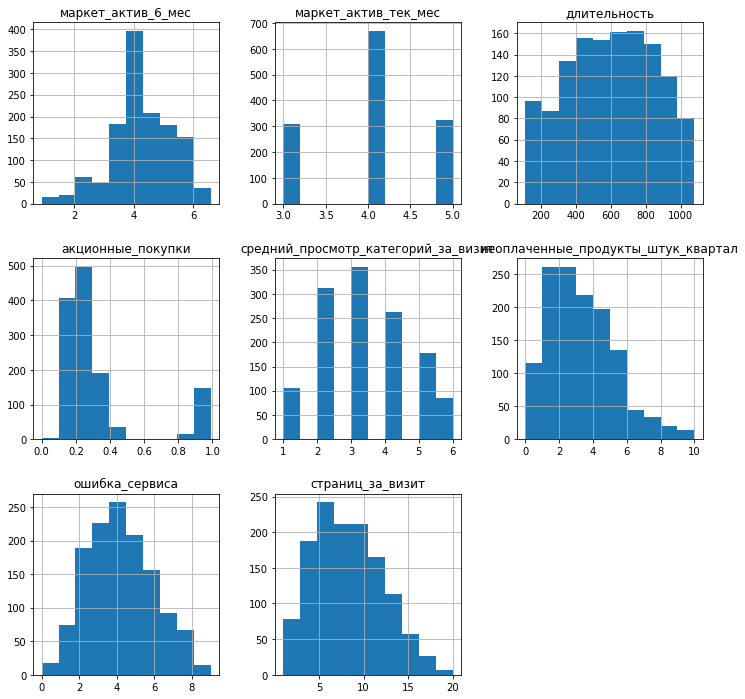

In [13]:
plot_hist(market_file)

При анализе датафрейма **market_file** отметим, что:
1. В датафрейме 1300 строк и 13 столбцов, 9 - с числовыми признаками, 4 - с категориальными.
2. В переменной **тип сервиса** есть неявные дубликаты: "стандарт" и "стандартт". Требуется заменить
3. В датафрейме нет пропущенных значений и дубликатов

In [14]:
market_file["тип_сервиса"] = market_file["тип_сервиса"].replace("стандартт", "стандарт")

### market_money

In [15]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [16]:
info(market_money)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
----------------------------------------------------------------------------------------------------
пропущенные значения: 
id         0.0
период     0.0
выручка    0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Количество дубликатов: 
0
----------------------------------------------------------------------------------------------------


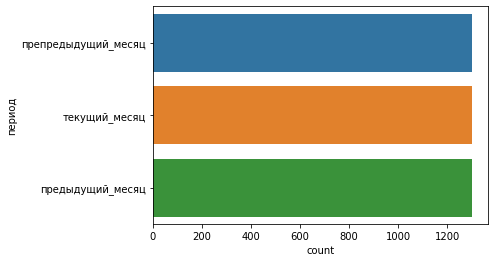

In [17]:
plot_object(market_money)

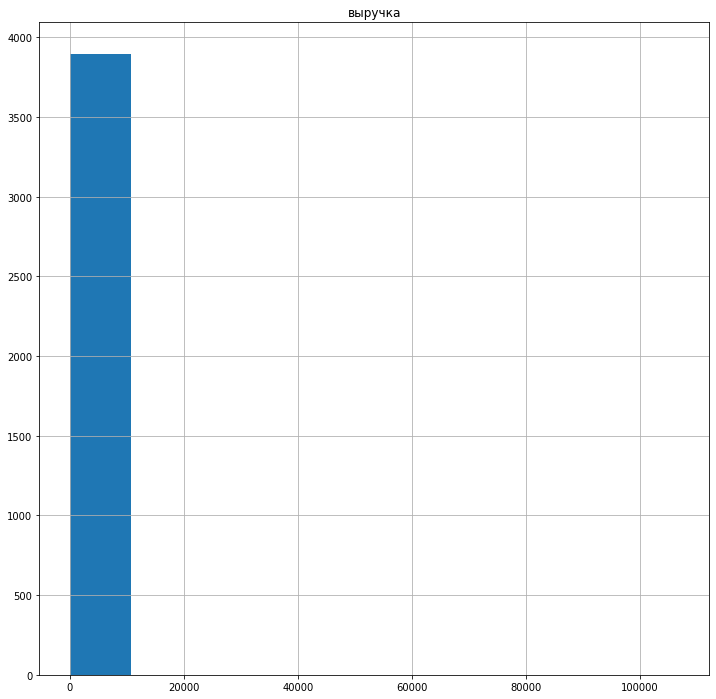

In [18]:
plot_hist(market_money)

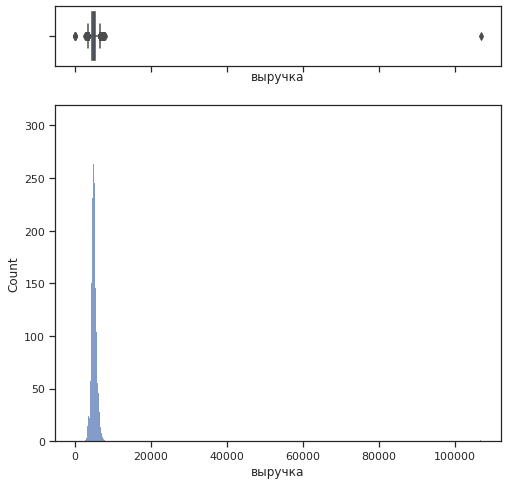

In [19]:
sns.set(style='ticks')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(8, 8), gridspec_kw={"height_ratios": (0.15, 0.85)})
sns.boxplot(x=market_money['выручка'], ax=ax_box)
sns.histplot(x=market_money['выручка'], ax=ax_hist);

In [20]:
market_money = market_money[market_money['выручка'] < 20_000]

<AxesSubplot:xlabel='выручка', ylabel='Count'>

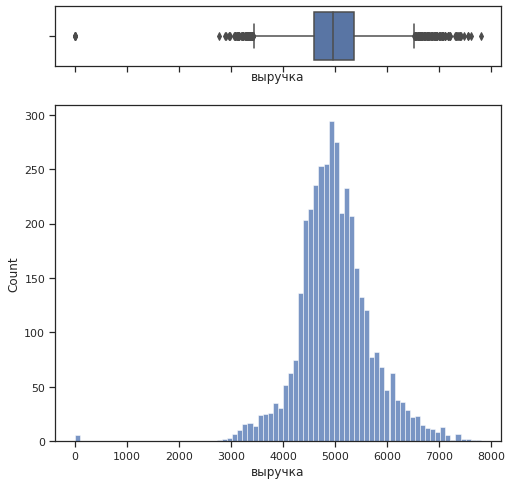

In [21]:
sns.set(style='ticks')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(8, 8), gridspec_kw={"height_ratios": (0.15, 0.85)})
sns.boxplot(x=market_money['выручка'], ax=ax_box)
sns.histplot(x=market_money['выручка'], ax=ax_hist)

In [22]:
market_money = market_money[market_money['выручка'] > 1_000]

<AxesSubplot:xlabel='выручка', ylabel='Count'>

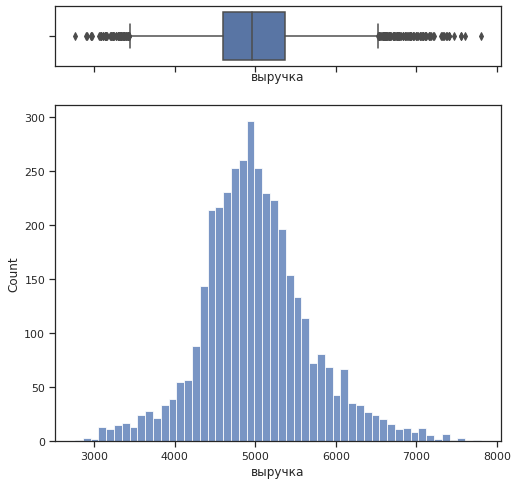

In [23]:
sns.set(style='ticks')
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(8, 8), gridspec_kw={"height_ratios": (0.15, 0.85)})
sns.boxplot(x=market_money['выручка'], ax=ax_box)
sns.histplot(x=market_money['выручка'], ax=ax_hist)

При анализе датафрейма **market_money** отметим, что:
1. В датафрейме 3900 строк и 3 столбца, 2 - с числовыми признаками, 1 - с категориальными.
2. В переменной **выручка** есть выбросы: аномально высокое (более 20_000) и аномально низкое (менее 1000) значения. Выбросы были удалены.
3. В датафрейме нет пропущенных значений и дубликатов.

### market_time

In [24]:
info(market_time)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
----------------------------------------------------------------------------------------------------
пропущенные значения: 
id        0.0
период    0.0
минут     0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Количество дубликатов: 
0
----------------------------------------------------------------------------------------------------


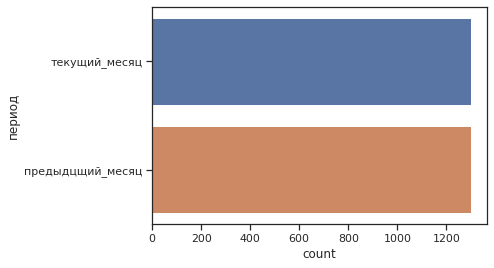

In [25]:
plot_object(market_time)

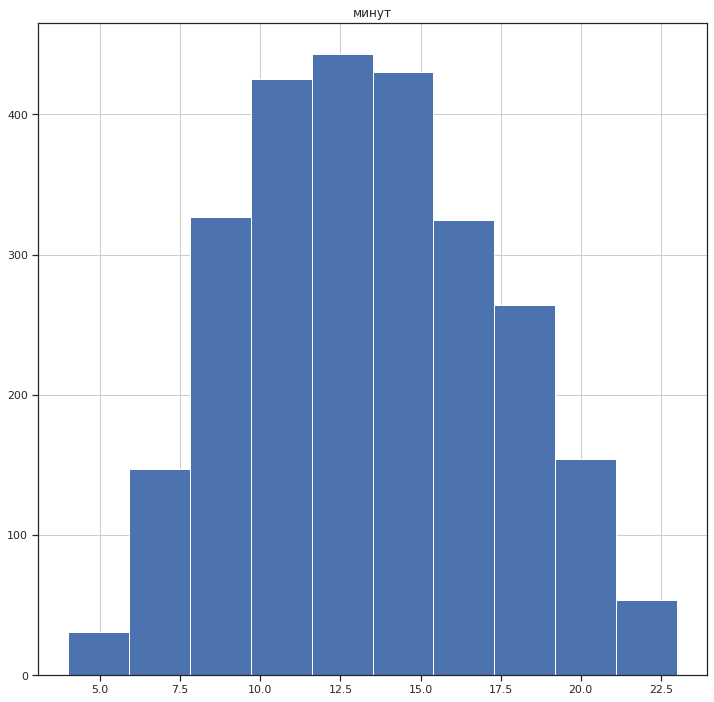

In [26]:
plot_hist(market_time)

In [27]:
market_time['период'] = market_time['период'].replace("предыдцщий_месяц", "предыдущий_месяц")

При анализе датафрейма **market_time** отметим, что:
1. В датафрейме 2600 строк и 3 столбца, 2 - с числовыми признаками, 1 - с категориальными.
2. В датафрейме нет пропущенных значений и дубликатов.
3. В переменной **период** есть записи с орфографической ошибкой - "предыдцщий_месяц", произведена замена на "предыдущий_месяц"

### money

In [28]:
info(money)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
----------------------------------------------------------------------------------------------------
пропущенные значения: 
id         0.0
прибыль    0.0
dtype: float64
----------------------------------------------------------------------------------------------------
Количество дубликатов: 
0
----------------------------------------------------------------------------------------------------


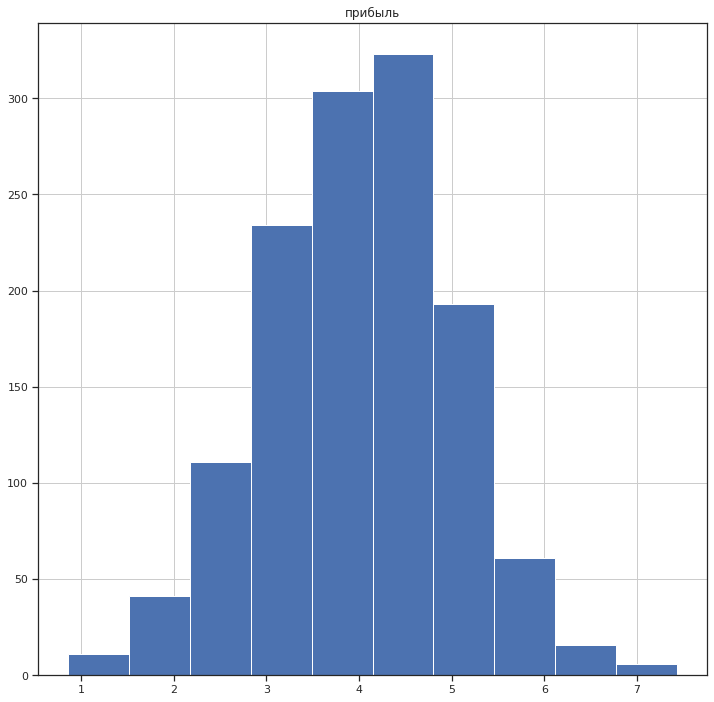

In [29]:
plot_hist(money)

При анализе датафрейма **money** отметим, что:
1. В датафрейме 1300 строк и 2 столбца, 2 - с числовыми признаками, 0 - с категориальными.
2. В датафрейме нет пропущенных значений и дубликатов.


В шаге **предобработки данных** было сделано следующее:
1. Выявлено количество строк и столбцов в каждом из 4-х датафреймов.
2. В датафрейме **market_file** в переменной **тип_сервиса** устранены неявные дубликаты.
3. В датафрейме **market_money** в переменной **выручка** удалены два выброса.
4. В датафрейме **market_time** в переменной **период** устранена орфографическая ошибка в записях "предцдущий_месяц".

## Исследовательский анализ данных

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [30]:
market_money_3_month = market_money.groupby('id').aggregate({'период':'nunique'})
market_money_3_month_indx = market_money_3_month[market_money_3_month['период']==3].index

отфильтруем датафреймы по этим клиентам

In [31]:
market_file = market_file[market_file.id.isin(market_money_3_month_indx)]
market_money = market_money[market_money.id.isin(market_money_3_month_indx)]
market_time = market_time[market_time.id.isin(market_money_3_month_indx)]
money = money[money.id.isin(market_money_3_month_indx)]

### market_file

In [32]:
market_file.select_dtypes(include='object').describe()

,покупательская_активность,тип_сервиса,разрешить_сообщать,популярная_категория
count,1296,1296,1296,1296
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,922,959,329


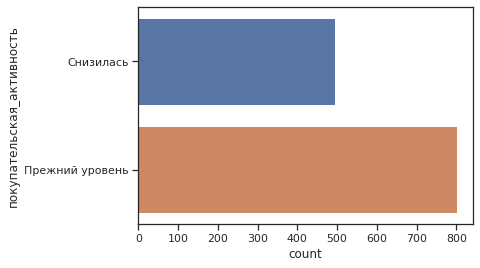

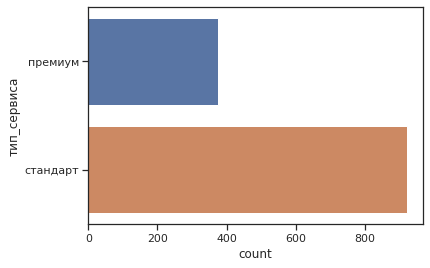

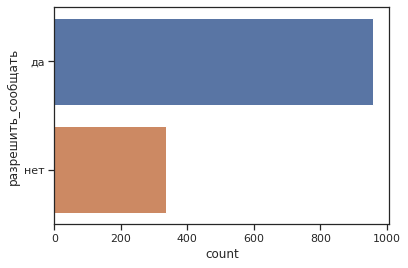

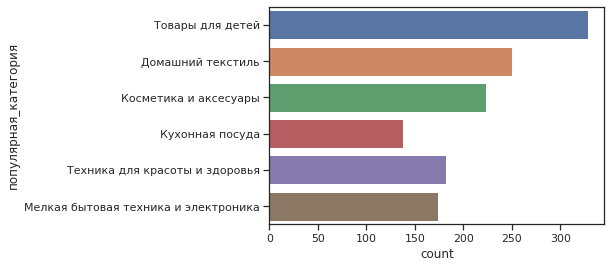

In [33]:
plot_object(market_file)

In [34]:
market_file.drop(columns='id').select_dtypes(exclude='object').describe()

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500
std,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459
min,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


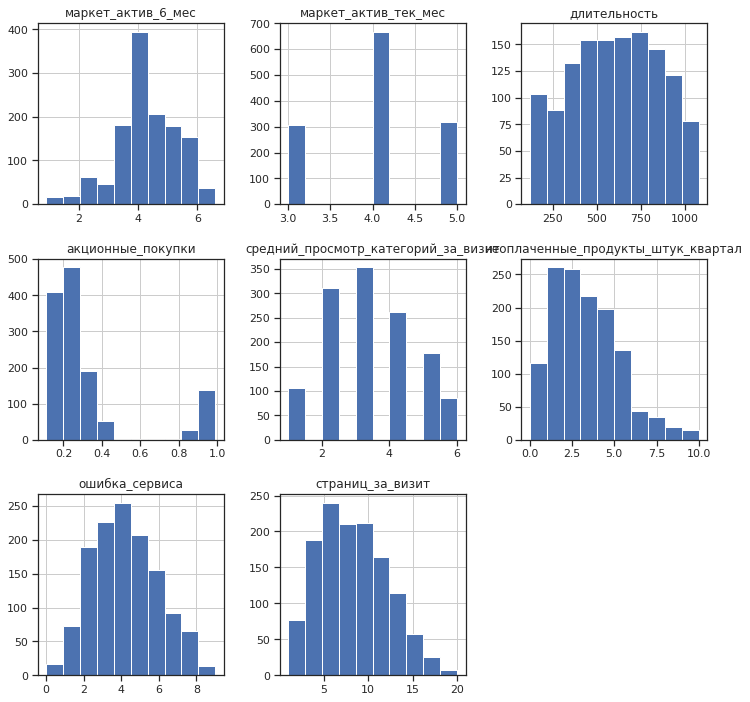

In [35]:
plot_hist(market_file)

При анализе датафрейма **market_file** выявлено следующее:
1. Целевая переменная **покупательская_активность** имеет дисбаланс классов: записей со значением **снизилось** - 500, **прежний уровень** - 800.
2. В категориальных признаках **тип_сервиса	разрешить_сообщать	популярная_категория** то же присутствует дисбаланс. Самый распространенный **тип_сервиса** - это **стандарт**, **разрешенно_сообщать** - это **да**. Самая часто встречающаяся запись в признаке **популярная_категория** - это **Товары для детей**, самая редко встречающаяся - это **Кухонная посуда**.
3. Распределение признака **маркет_актив_6_мес** отдаленно напоминает нормальное распределение. При этом среднее и медианное значение равно 4.2.
4. Судя по распределению переменной **маркет_актив_тек_мес**, количество маркетинговых коммуникаций с покупателем было 4, 5, 6. Чаще всего 4 коммуникации.
5. По гистограмме переменной **длительность** видно, что примерно 400 дней назад количество регистраций новых пользователей стало снижаться.
6. Судя по гистограмме переменной **акционные_покупки**, можно сделать предположение, что клиенты делятся на 2 категории: 1-ая - доля акционных покупок менее 45%, 2-ая - доля окцинных покупок более 80%. Данный предположение можно использовать для создания категориальной переменной.
7. Распределение  переменной **средний_просмотр_категорий_за_визит** выглядит нормальным. В среднем клиент просматривает 3 категории за визит.
8. Распределение переменных **неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит** скошенное правостороннее.
В среднем клиент не оплачивает 3 покупки в квартал, сталкивается с 4 ошибками на сайте, за один визит просматривает 8 страниц.

### market_money

In [36]:
market_money.select_dtypes(include='object').describe().T

,count,unique,top,freq
период,3888,3,текущий_месяц,1296


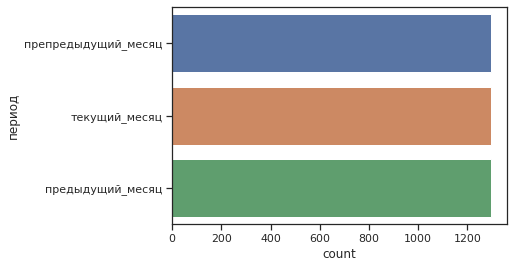

In [37]:
plot_object(market_money)

In [38]:
market_money.drop(columns='id').select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
выручка,3888.0,5007.255658,679.193461,2758.7,4591.95,4959.0,5363.0,7799.4


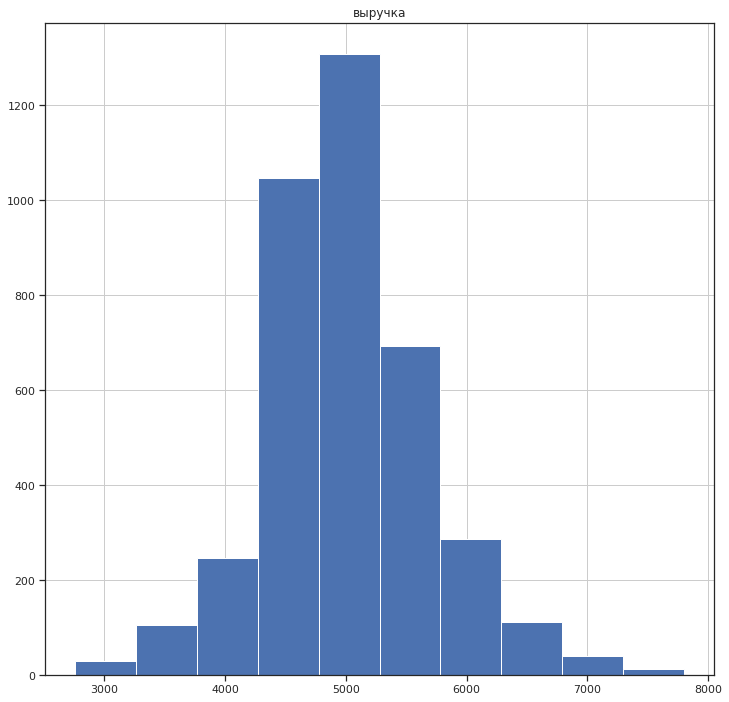

In [39]:
plot_hist(market_money)

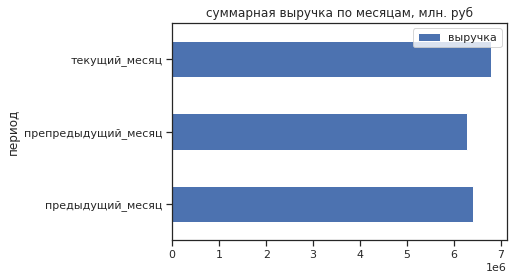

In [40]:
market_money.groupby('период').aggregate({'выручка':'sum'}).plot(kind='barh', title='суммарная выручка по месяцам, млн. руб');

In [41]:
market_money.groupby(['период', 'id'], as_index=False).aggregate({'выручка':'sum'}) \
            .groupby('период', as_index=False).aggregate({'выручка':'mean', 'id':'count'}) \
            .rename(columns={'выручка':'средн_мес_выручка', 'id':'количество_клиентов'})

,период,средн_мес_выручка,количество_клиентов
0,предыдущий_месяц,4947.468750,1296
1,препредыдущий_месяц,4836.202160,1296
2,текущий_месяц,5238.096065,1296


При анализе датафрейма **market_money** выявлено следующее:
1. в категориальной переменной **период** отсутствует дисбаланс классов.
2. распределение переменной **выручка** похоже на нормальное.
3. выручка в текущем месяце немного больше, чем в предыдущие. Это связано с тем, что выросла среднемесячная выручка, которую приносит одни клиент.


### market_time

In [42]:
market_time.select_dtypes(include='object').describe().T

,count,unique,top,freq
период,2592,2,текущий_месяц,1296


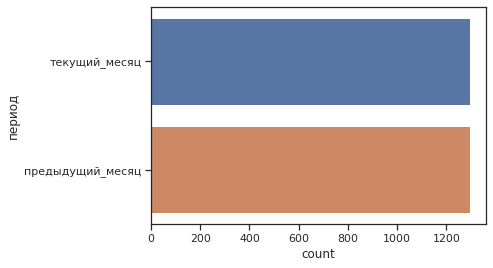

In [43]:
plot_object(market_time)

In [44]:
market_time.drop(columns='id').select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
минут,2592.0,13.340664,4.083469,4.0,10.0,13.0,16.0,23.0


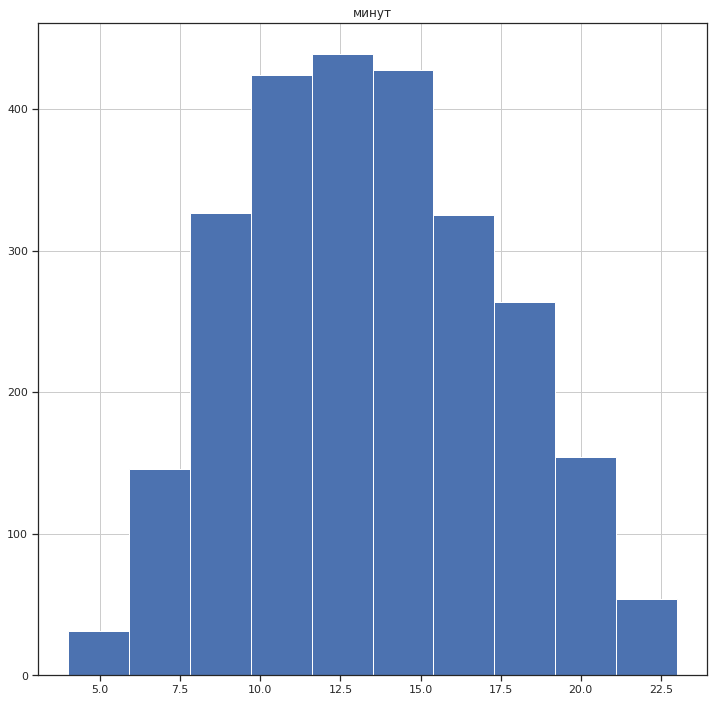

In [45]:
plot_hist(market_time)

In [46]:
market_time.groupby(['период', 'id'], as_index=False).aggregate({'минут':'mean'}) \
            .groupby('период', as_index=False).aggregate({'минут':'mean', 'id':'count'}) \
            .rename(columns={'минут':'средн_мес_минут', 'id':'количество_клиентов'})

,период,средн_мес_минут,количество_клиентов
0,предыдущий_месяц,13.470679,1296
1,текущий_месяц,13.210648,1296


При анализе датафрейма **market_time** выявлено следующее:
1. Категориальная переменная **период** состоит из двух классов, которые сбалансированы. По сравнению с аналогичной переменной датафрейма **market_money** отсутствует класс **предпредыдущий**.
2. Распределение значений переменной **минут** похоже на нормальное, со средним 13.3 мин.
3. По сравнению с предыдущим месяцем клиенты стали проводить на сайте немного меньше времени (13.5 мин в предыдущем и 13.2 мин в текущем месяце).

### money

In [47]:
money.drop(columns='id').describe().T

,count,mean,std,min,25%,50%,75%,max
прибыль,1296.0,3.997701,1.011198,0.86,3.3,4.045,4.67,7.43


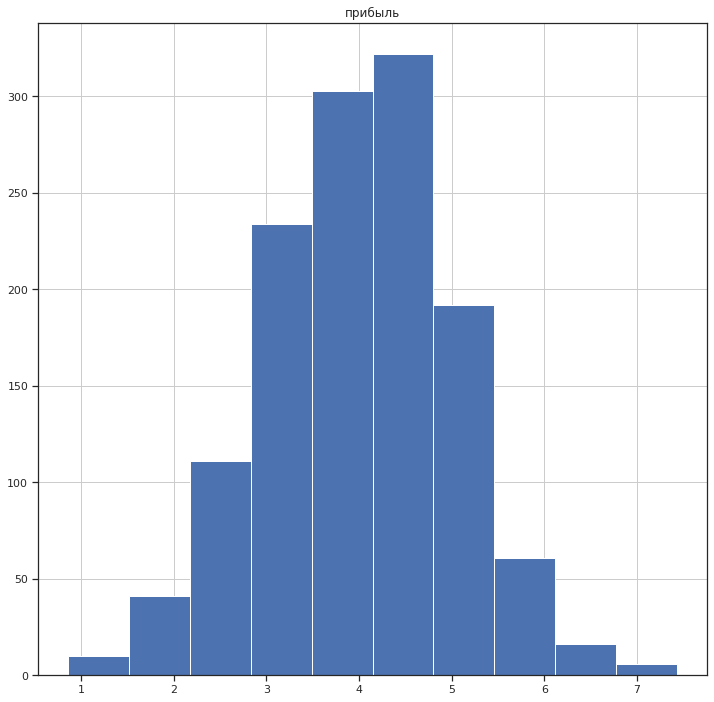

In [48]:
plot_hist(money)

При анализе датафрейма **money** выявлено следующее:
1. Распределение переменной прибыль выглядит нормальным, со средним 4

В шаге **исследовательского анализа данных** было сделано следующее:
1. Проанализированы категориальные и числовые переменные всех четырех датафреймов.
2. В целевой перменной  **покупательская_активность** датафрейма **market_file** имеется дисбаланс классов, который нужно учитывать при создании моделей.
3. Распределение значений у переменных **маркет_актив_6_мес, средний_просмотр_категорий_за_визит, выручка, минут, прибыль** похоже на нормальное.
4. По  распределению переменной **длительность** было выявлено, что примерно 400 дней назад количество регистраций новых пользователей стало снижаться.
5. По гистограмме переменной **акционные_покупки**, сделано предположение, что клиентов можно условно разбить на 2 категории: 1- доля акционных покупок менее 45%, 2 - доля акционных покупок более 80%. Данный предположение можно использовать для создания категориальной переменной.
6. В датафрейме **market_money** переменная **период** состоит из 3-х значений: 'препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц', а вот эта же переменная на в датафрейме **market_time** уже состоит из 2-х значений: 'предыдущий_месяц', 'текущий_месяц'. В этих переменных присутствует баланс классов.
7. Дисбаланс классов отмечается у переменных: **тип_сервиса разрешить_сообщать популярная_категория**. 
8. Распределение переменных **неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит** скошенное правостороннее. В среднем клиент не оплачивает 3 покупки в квартал, сталкивается с 4 ошибками на сайте, за один визит просматривает 8 страниц.
9. Выручка в текущем месяце немного больше, чем в предыдущие. Это связано с тем, что выросла среднемесячная выручка, которую приносит одни клиент.
10. По сравнению с предыдущим месяцем клиенты стали проводить на сайте немного меньше времени (13.5 мин в предыдущем и 13.2 мин в текущем месяце)

## Объединение таблиц

проверим есть ли id, которые не встречаются во всех датафремах одновременно

In [49]:
set_id = set()
for comb in itertools.combinations([set(df.id) for df in [market_file, market_money, market_time]], 2):
    set_id = set_id.union(comb[0].symmetric_difference(comb[1]))
print(set_id)

set()


Таких id нет. Выполним объединение датафреймов

In [50]:
for df_name in ['market_file', 'market_money', 'market_time']:
    print(f"размерность датафрейма {df_name}: {eval(df_name).shape}")

размерность датафрейма market_file: (1296, 13)
размерность датафрейма market_money: (3888, 3)
размерность датафрейма market_time: (2592, 3)


Объединим сначала таблицы **market_money** и **market_time** по столбцам 'id', 'период'. При этом учтем, что в таблице **market_time** отсутствуют записи за предпредыдущий_период

In [51]:
df = market_money.merge(market_time, on=['id', 'период'], how='left') \
            .pivot(index='id', columns='период', values=['выручка', 'минут'])
df.columns = ['_'.join(col) for col in df.columns.to_flat_index()]
df = df.reset_index()
df = df.dropna(how='all', axis=1)
df.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,5216.0,4472.0,4971.6,12.0,10.0
1,215350,5457.5,4826.0,5058.4,8.0,13.0
2,215351,6158.0,4793.0,6610.4,11.0,13.0
3,215352,5807.5,4594.0,5872.5,8.0,11.0
4,215353,4738.5,5124.0,5388.5,10.0,10.0


In [52]:
df.shape

(1296, 6)

In [53]:
info(df)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1296 non-null   int64  
 1   выручка_предыдущий_месяц     1296 non-null   float64
 2   выручка_препредыдущий_месяц  1296 non-null   float64
 3   выручка_текущий_месяц        1296 non-null   float64
 4   минут_предыдущий_месяц       1296 non-null   float64
 5   минут_текущий_месяц          1296 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 60.9 KB
----------------------------------------------------------------------------------------------------
пропущенные значения: 
id                             0.0
выручка_предыдущий_месяц       0.0
выручка_препредыдущий_месяц    0.0
выручка_текущий_месяц          0.0
минут_предыдущ

Пропущенных значений и дубликатов нет. Объединим получившийся датафрейм с **market_file**

In [54]:
df = market_file.merge(df, on='id')

In [55]:
info(df)

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  


In [56]:
df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12.0,10.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8.0,13.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11.0,13.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8.0,11.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10.0,10.0


В шаге **Объединение таблиц** было сделано следующее:
1. Выявлено, что нет id , которые бы присутствовали в одной из таблиц, но отсутствовали бы в двух оставшихся.
2. Объединены две таблицы **market_money** и **market_time** по столбцам 'id', 'период'. При этом учитывалось, что в таблице **market_time** отсутствуют записи за предпредыдущий_период.
3. Объединена получившаяся таблица с таблицей **market_file**.
4. Выявлено, что в получившемся датафрейме **df** отсутствуют пропущенные значения и дубликаты, а также количество строк равно количеству id.

## Корреляционный анализ

Так как  не у всех числовых переменных распределение похоже на нормальное, то будем использовать корреляцию Спирмена, потому что она устойчива к ненормальным распределениям.

In [57]:
interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц']

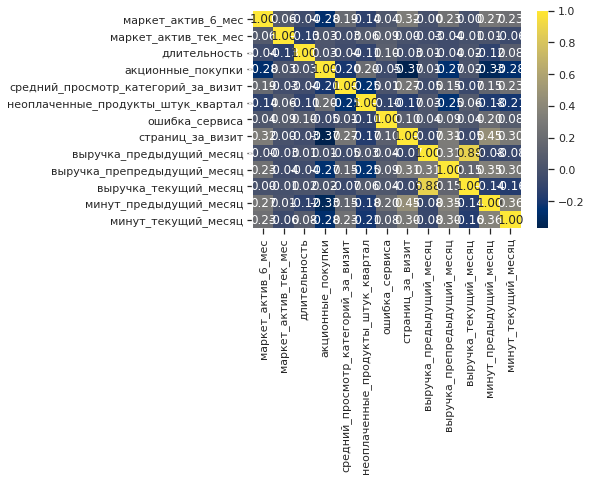

In [58]:
sns.heatmap(df.drop('id', axis=1).corr(method='spearman'), annot=True, cmap='cividis', fmt='.2f');

все признаки плохо коррелируют между собой, кроме признаков **выручка_предыдущий_месяц** и **выручка_текущий_месяц** Кр=0.88. Такой высокий коэффициент корреляции может свидетельствовать о наличии мультиколлинеарности, поэтому при обучении моделей, не будет одновременно использовать оба признака, оставим только одни - **выручка_текущий_месяц**.

Так как в датафрейме **df** присутствуют категориальные признаки, то для нахождения коэффициента корреляции с такими признаками, будем использовать phik-корреляцию

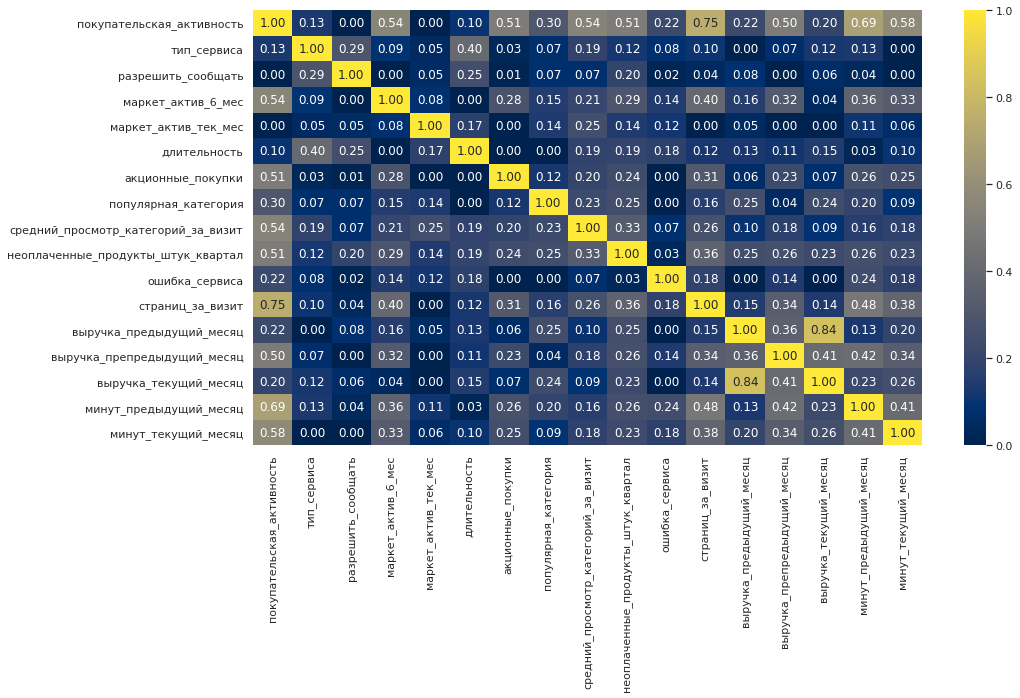

In [59]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.heatmap(df.drop('id', axis=1) 
              .phik_matrix(interval_cols=interval_cols), annot=True, cmap='cividis', fmt='.2f');

Целевая переменная **покупательная_активность** хорошо коррелирует (Кр>0.5) с признаками: **'маркет_актив_тек_мес', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц'** - именно эти признаки точно будут в модели.

Целевая переменная **покупательная_активность** средне коррелирует (Кр= 0.2-0.5) с признаками: **'популярная_категория', 'ошибка_сервиса', 'выручка_текущий_месяц'** - о необходимости удаления этих признаков при обучении модели, будем судить после проверки значимости признаков уже на обученной модели.

Целевая переменная **покупательная_активность** плохо или вобще не коррелирует (Кр<0.2) с признаками: **'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_тек_мес', 'длительность', 'выручка_предыдущий_месяц'** (с этой переменной Кр=0.2, но ее исключаем из-за мультиколинеарности) - эти признаки вообще можно не использовать в обучении модели.

На шаге **корреляционного анализа** было сделано следующее:
1. Были построены матрицы корреляции Спирмена и phik.
2. Найдены 2 признака, которые очень сильно друг с другом коррелируют: **выручка_предыдущий_месяц и выручка_текущий_месяц**.
3. Определены переменные, которые хорошо коррелируют с целевой: **'маркет_актив_тек_мес', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц'**.
4. Определены переменные, которые средне коррелируют с целевой: **'популярная_категория', 'ошибка_сервиса', 'выручка_текущий_месяц'**.
5. Определены переменные, которые плохо или вообще не коррелируют с целевой: **'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_тек_мес', 'длительность'**.

## Использование пайплайнов

### Создание обучающей и тестовой выборок

Создадим списки с наименованием числовых и категориальных (отдельно для категориальных, отдельно для порядковых) переменных. Закодируем целевую переменную ** покупательская_способность**: класса 1 - снизилась, класс 0 - прежний уровень.  Так же разобьем выборку на обучающую и тестовою, при этом будем использовать стратификацию, т.к. в целевой переменной присутствует дисбаланс классов.

In [60]:
cols_num = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки', 
             'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
             'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 
             'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']
cols_cat = ['популярная_категория']
cols_ord = ['тип_сервиса','разрешить_сообщать']

In [61]:
df['покупательская_активность_class'] = (df['покупательская_активность'] == 'Снизилась')*1

In [62]:
X = df.drop(columns=['id', 'покупательская_активность', 'покупательская_активность_class'])
y = df['покупательская_активность_class']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=TRAIN_SIZE, random_state=RANDOM_STATE,
                                                    stratify=y)

### Создание пайплана для подготовки данных
Создадим пайплайн для подготовки данных. Категориальные переменные будем обрабатывать OneHotEncoding, OrdinalEncoder, числовые переменные StandardScaler, MinMaxScaler. Так же предусмотрим на случай появления пропусков в данных, их заполнение: для категориальных переменных - самым часто встречающимся значением, для числовых - средним.


In [64]:
# Пайплайн для OHE-кодирования
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ])

In [65]:
ord_pipe = ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да']
                ], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
) 

In [66]:
# Пайплайн для StandardScaler масштабирования
ss_pipe = Pipeline(
    [
        ('simpleImputer_ss', SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('ss', StandardScaler())
    ])

In [67]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cols_cat),
        ('ord', ord_pipe, cols_ord),
        ('num', ss_pipe, cols_num)
    ], remainder='passthrough')

### Создание итогового пайплайна для обучения модели

In [68]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

### Создание сетки для подбора гиперпараметров

Для целей задачи предсказания снижения активности, имеет большое значение верное предсказание класс 1 "активность снизилась". Не так критично, если модель не верно предскажет, что активность у клиента снизилась, а на самом деле нет, как если модель неверно определит, что активность на прежнем уровне, а на самом деле она снизилась, и не были предприняты никакие действия по удержанию клиента. Т.е. мы заинтересованы уменьшить ошибку ложно отрицательных прогнозов, а за это отвечает метрика **recall**

In [116]:
param_grid = [
    # словарь для модели DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l2')],
        'models__C': [range(1, 20, 4)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели SVC
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': [ 1, 2, 3, 4, 5, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

Обучение моделей проведем при использовании всех переменных. Качество лучшей модели будет наш baseline. Потом определим какие параметры лучше оставить и заново обучим модели.

In [117]:
search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1185.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1097, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)" % s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleImputer_ss',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['маркет_актив_6_мес',
                                                                          'маркет_актив_тек_мес',
                                                                          'длительность',
                                                                          'акционные_покупки',
                                                                          'средний_просмотр_категорий_за_визит',
                                                                          'неоплаченные_продукты_штук_кв...
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(C=10, probability=True,
                                         random_state=42)],
                          'models__C': [1, 2, 3, 4, 5, 10],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [KNeighborsClassifier()],
                          'models__n_neighbors': range(2, 10),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

In [118]:
model = search.best_estimator_
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'страниц_за_визит',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', SVC(C=10, probability=True, random_state=42))])

In [119]:
search.best_score_

0.7763243243243243

In [120]:
y_test_pred = search.predict(X_test)
print(f"""recall = {recall_score(y_test, y_test_pred):.3f}
accuracy = {accuracy_score(y_test, y_test_pred):.3f}""")

recall = 0.789
accuracy = 0.883


В шаге **Использования пайплайнов** было сделано следующее:
1. Отобраны обучающие и тестовые выборки, при этом учитывался дисбаланс классов в целевой переменной.
2. Создан пайплайн **data_preprocessor** для подготовки данных к обучению. Для категориальных данных предусмотрен OneHotEncoder, для категориальных порядковых - OrdinalEncoder, для числовых - StandardScaler.
3. Создан итоговый пайплайн **final_pipe** для обучения моделей.
4. Создана сетка для подбора гиперпараметров для 4 алгоритмов машинного обучения.
5. Определена метрика для оценки качества модели - recall.
6. С помощью GridSearchCV найдена лучшая модель. Ей оказалась SVC(C=10).

## Анализ важности признаков

Оценим важность признаков для нашей лучшей модели. Лучшая модель у нас это SVC(C=10).

In [121]:
model.named_steps['models']

SVC(C=10, probability=True, random_state=42)

In [122]:
X_train_new = pd.DataFrame(model.named_steps['preprocessor'].transform(X_train),
                           columns=model.named_steps['preprocessor'].get_feature_names_out())


# Уменьшаем количество наблюдений для меньшего ожидания исполнения кода
background = shap.sample(X_train_new, 10)
explainer = shap.KernelExplainer(model.named_steps['models'].predict_proba, background)

shap_values = explainer(background) 

  0%|          | 0/10 [00:00<?, ?it/s]

In [123]:
# model = SVC(C=10, random_state=42,  probability=True)

# X_train_new = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(X_train),
#                            columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())
# X_test_new = pd.DataFrame(pipe_final.named_steps['preprocessor'].transform(X_test),
#                            columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

# model.fit(X_train_new, y_train)

#  # Уменьшаем количество наблюдений для меньшего ожидания исполнения кода
# background = shap.sample(X_train_new, 100)
# explainer = shap.KernelExplainer(model.predict_proba, background)


# shap_values = explainer(background) 

На диаграмме **beeswarm** посмотрим визуализацию вклада признаков в каждое предсказание модели

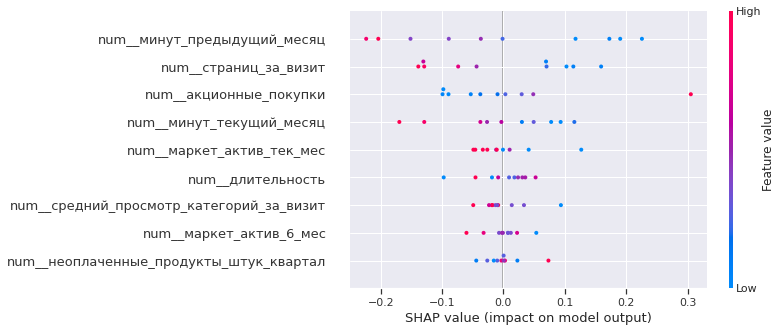

In [124]:
shap.plots.beeswarm(shap_values[:,:,1]) 

Если у признаков **страниц_за_визит, минут_текущий_месяц, минут_предыдущий_месяц, средний_просмотр_категорий_за_визит,  маркет_актив_6_мес** низкие значения, то это уввеличивает вероятность предсказания класса 1 (снижения активности). А уменьшение значений признаков **неоплаченные_продукты_штук_квартал, акционные_покупки**, наоборот увеличивает вероятность предсказания класса 0 (активность на прежнем уровне).

На диаграмме **waterfall** визуализируем индивидуальные SHAP-значения для 6-го наблюдения. 

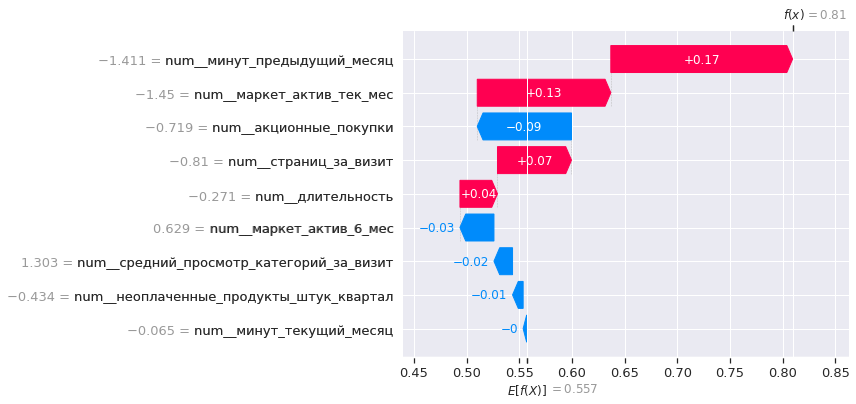

In [125]:
shap.plots.waterfall(shap_values[:,:,1][6]) 

Для объекта 6 самое большое влияние в предсказание к принадлежности к классу 1 оказали 2 признака: **минут_предыдущий_месяц, страниц_за_визит**

На столбчатой диаграмме **shap.plots.bar** отразим общий вклад признаков в прогнозы модели. 

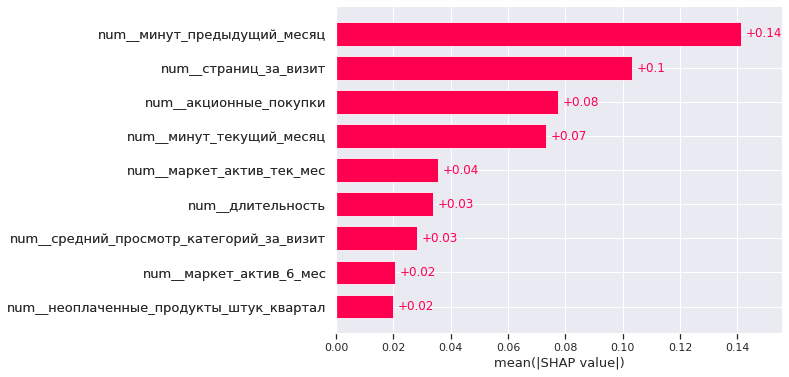

In [126]:
shap.plots.bar(shap_values[:,:,1]) 

Сильнее всего на прогноз модели влияют следующие признаки (mean|shap value| >= 0.02): **страниц_за_визит, минут_текущий_месяц, минут_предыдущий_месяц, неоплаченные_продукты_штук_квартал, средний_просмотр_категорий_за_визит, акционные_покупки, маркет_актив_6_мес, длительность, маркет_актив_тек_мес**. Как мы ранее выяснили именно эти переменные имели самые большие коэффициенты корреляции с целевой переменной. Менее всего на прогноз модели влияют все остальные переменные.

In [127]:
cols_num = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки', 
             'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
              'страниц_за_визит',  'минут_предыдущий_месяц', 'минут_текущий_месяц']
cols_cat = []
cols_ord = []

In [128]:
X = df[cols_num]
y = df['покупательская_активность_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=TRAIN_SIZE, random_state=RANDOM_STATE,
                                                    stratify=y)

scaller = StandardScaler()

X_train_scalled = pd.DataFrame(scaller.fit_transform(X_train), columns=scaller.get_feature_names_out())
X_test_scalled = pd.DataFrame(scaller.transform(X_test), columns=scaller.get_feature_names_out())

model = SVC(C=10, random_state=RANDOM_STATE, probability=True)
model.fit(X_train_scalled, y_train)



SVC(C=10, probability=True, random_state=42)

In [129]:
# в отдельный список сохраняем название всех 9 важных числовых переменных
cols_num = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки', 
             'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
              'страниц_за_визит',  'минут_предыдущий_месяц', 'минут_текущий_месяц']

# переопределяем заново препроцессор, но в этот раз он бцдет обрабатывать только числовые признаки
data_preprocessor = ColumnTransformer(
    [
        ('num', ss_pipe, cols_num) # ss_pipe инициализировали выше
    ], remainder='passthrough')

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])

# Отберем в выборку только 9 важных признаков
X = df[cols_num]
y = df['покупательская_активность_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=TRAIN_SIZE, random_state=RANDOM_STATE,
                                                    stratify=y)
# Зададим сетку для поиска гиперпараметров
search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
   )

search.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 1185.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1097, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)" % s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleImputer_ss',
                                                                                          SimpleImputer()),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['маркет_актив_6_мес',
                                                                          'маркет_актив_тек_мес',
                                                                          'длительность',
                                                                          'акционные_покупки',
                                                                          'средний_просмотр_категорий_за_визит',
                                                                          'неоплаченные_продукты_штук_кв...
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(C=10, probability=True,
                                         random_state=42)],
                          'models__C': [1, 2, 3, 4, 5, 10],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [KNeighborsClassifier()],
                          'models__n_neighbors': range(2, 10),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

In [130]:
model = search.best_estimator_
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'страниц_за_визит',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', SVC(C=10, probability=True, random_state=42))])

In [131]:
search.best_score_

0.7763243243243243

In [132]:
y_test_pred = search.predict(X_test)
print(f"""recall = {recall_score(y_test, y_test_pred):.3f}
accuracy = {accuracy_score(y_test, y_test_pred):.3f}""")

recall = 0.789
accuracy = 0.883


Выполнен поиск лучшей модели, но уже при 9 важных числовых признаков. И опять лучшей моделей оказалась SVC(C=10). Но метрика в этот раз чуть выше 0.776 (вместо 0.774 - на всех признаках).

В шаге **анализа важности признаков** было сделано следующее:
1. Для лучшей модели, найденной на предыдущем шаге, были рассчитаны shap_values.
2. С помощью shap_values были построены 3 диаграммы, показывающие важность признаков: beeswarm, waterfall и bar.
3. С помощью диаграмм определены 9 признаков, которые максимально влияют на предсказание модели. Это признаки: **страниц_за_визит, минут_текущий_месяц, минут_предыдущий_месяц, неоплаченные_продукты_штук_квартал, средний_просмотр_категорий_за_визит, акционные_покупки, маркет_актив_6_мес, длительность, маркет_актив_тек_мес**.
4. Из 9 признаков самыми важными являются: **страниц_за_визит, минут_текущий_месяц, минут_предыдущий_месяц**. Причем низкие значения этих признаков увеличивают вероятность предсказания класса 1 (снижения активности).
5. Обучили заново модель SVC(C=10), но уже с 9 самыми важными признаками.
6. Бизнесу необходимо отслеживать метрики, показывающие сколько страниц посетил клиент, и сколько времени провел в предыдущем и текущем месяце на сайте. Т.к. снижение этих метрик, говорит о том, что у клиента снизилась активность, и по нему необходимо принимать меры по повышению покупательской активности.

## Сегментация покупателей

Проведем сегментацию покупателей, но для начала с помощью лучшей модели спрогнозируем вероятность снижения покупательской способности для каждого покупателя. и к получившемуся датафрейму примерджим таблицу с прибылью.

In [133]:
df['вероятность_снижение_активности'] = model.predict_proba(df[cols_num])[:,1].round(2)

In [134]:
df.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,...,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность_class,вероятность_снижение_активности,прибыль_x,прибыль_y
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5216.0,4472.0,4971.6,12.0,10.0,1,0.98,4.16,4.16
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,5457.5,4826.0,5058.4,8.0,13.0,1,0.81,3.13,3.13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,6158.0,4793.0,6610.4,11.0,13.0,1,0.38,4.87,4.87
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,2,5807.5,4594.0,5872.5,8.0,11.0,1,0.97,4.21,4.21
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,4,4738.5,5124.0,5388.5,10.0,10.0,1,0.92,3.95,3.95


In [135]:
df = df.merge(money, on='id')

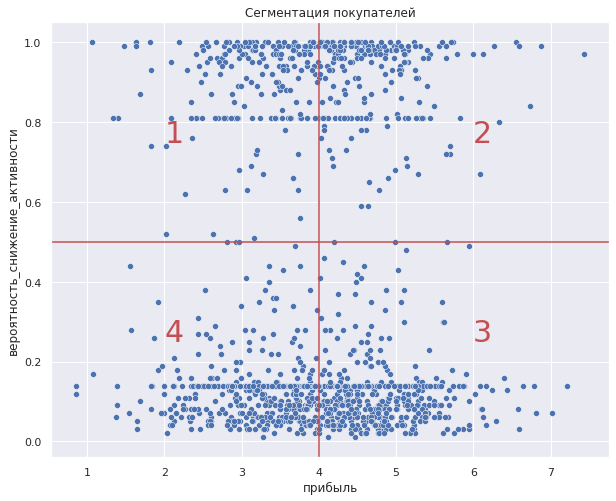

In [136]:
mean_profit = df['прибыль'].mean()
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, y='вероятность_снижение_активности', x='прибыль', ax=ax)
ax.axhline(y = 0.5, color = 'r', linestyle = '-') 
ax.axvline(x = mean_profit, color = 'r', linestyle = '-')

# Добавление номеров квадрантов
ax.text(mean_profit - 2, 0.75, '1', fontsize=30, color='r')  # Верхний левый
ax.text(mean_profit + 2, 0.75, '2', fontsize=30, color='r')  # Верхний правый
ax.text(mean_profit + 2, 0.25, '3', fontsize=30, color='r')  # Нижний правый
ax.text(mean_profit - 2, 0.25, '4', fontsize=30, color='r')  # Нижний левый

ax.set_title('Сегментация покупателей')
plt.show()

Получившейся скатерплот разделим на 4 квадранта: в 1 и 4 квадрант входят клиенты, которые приносят прибыль ниже средней. А в 2 и 3 - клиенты, клиенты с прибылью выше средней, только вот у клиентов попавших в 2 квадрант модель прогнозирует большую вероятность снижения покупательской активности. Нам бы хотелось перевести клиентов из квадранта 2 в квадрант 3 за счет уменьшения вероятности снижения покупательской активности. Для этого проанализируем клиентов, входящих в оба эти квадранта. условно примем клиентов из квадранта 2 как segment, а клиентов из квадранта 3 как segment_good

In [137]:
segment = df.loc[(df['вероятность_снижение_активности']>0.5)&(df['прибыль']>mean_profit)].reset_index(drop=True)
segment_good = df.loc[(df['вероятность_снижение_активности']<=0.5)&(df['прибыль']>mean_profit)].reset_index(drop=True)

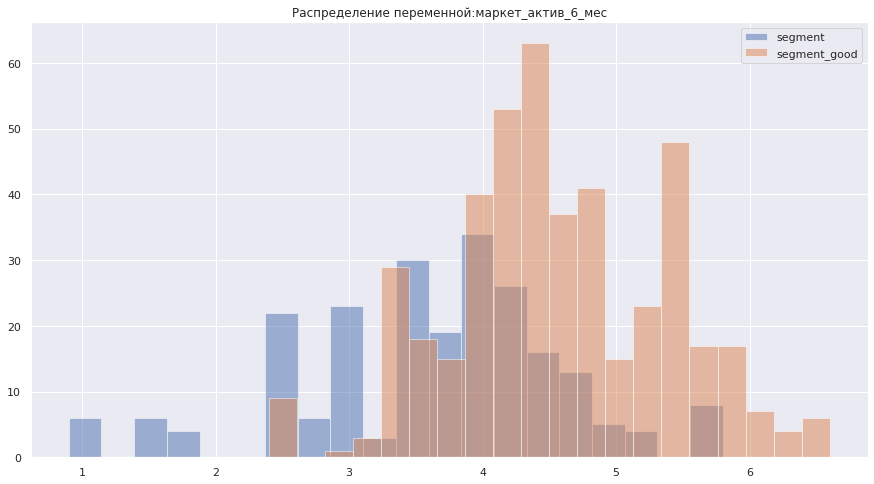

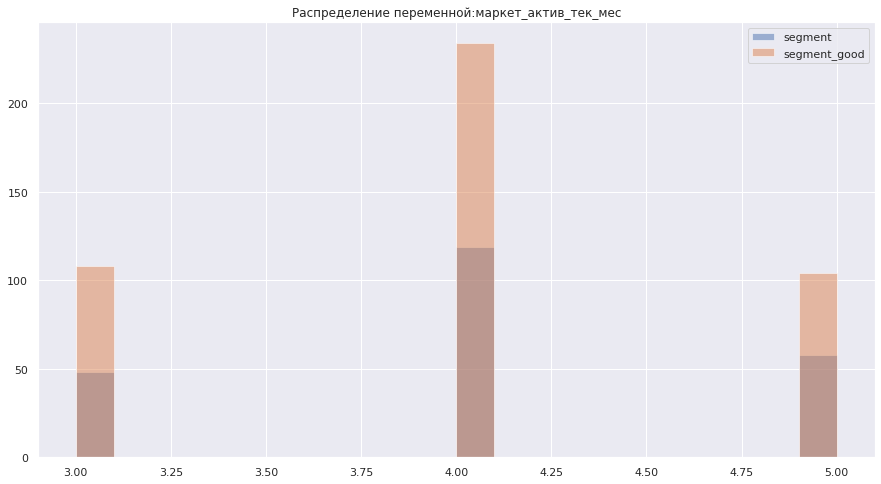

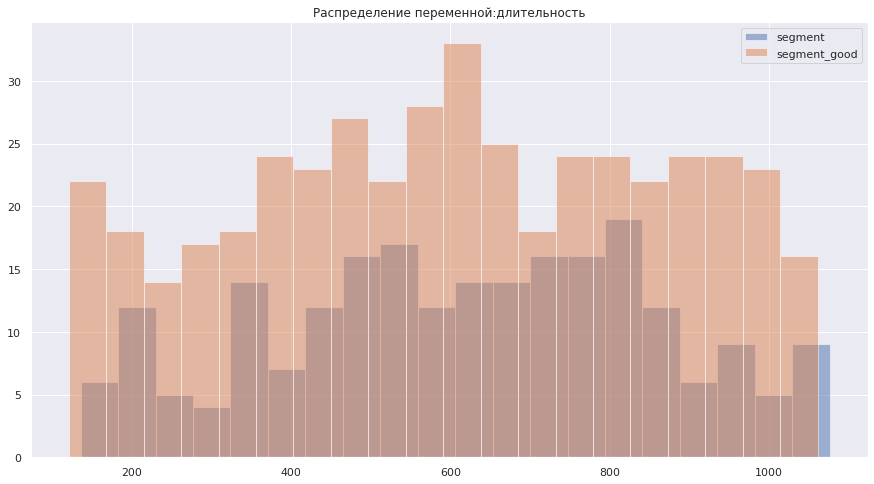

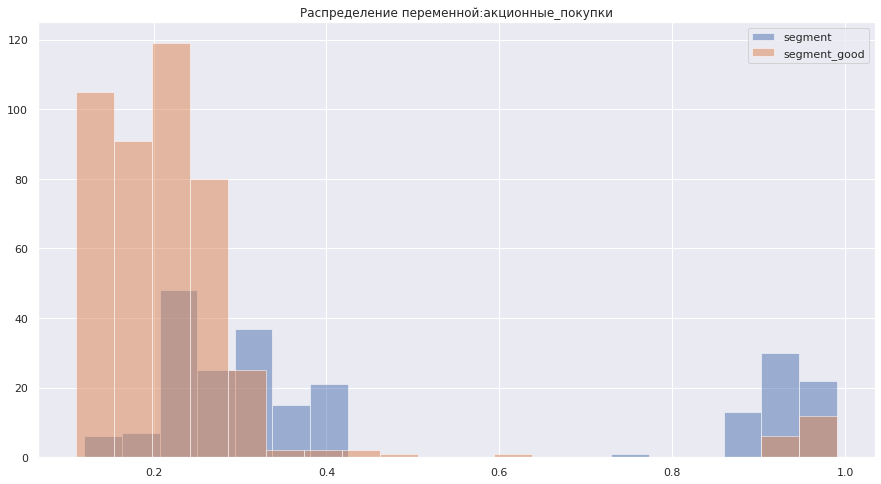

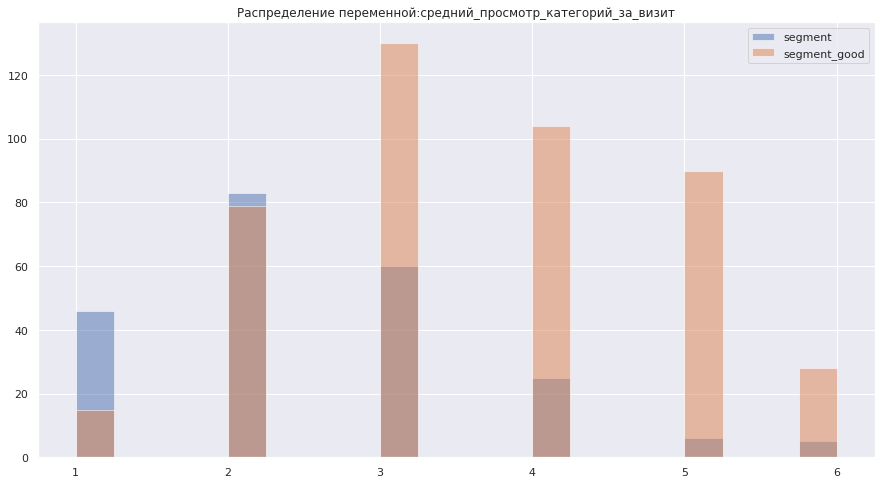

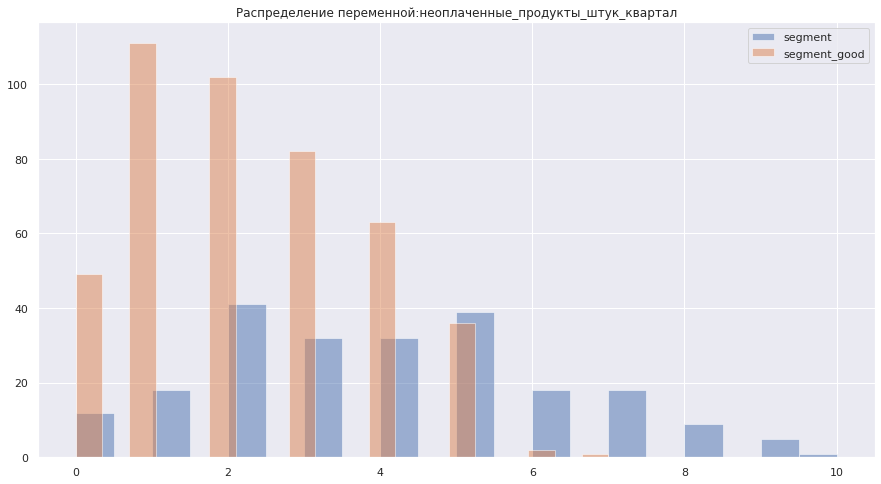

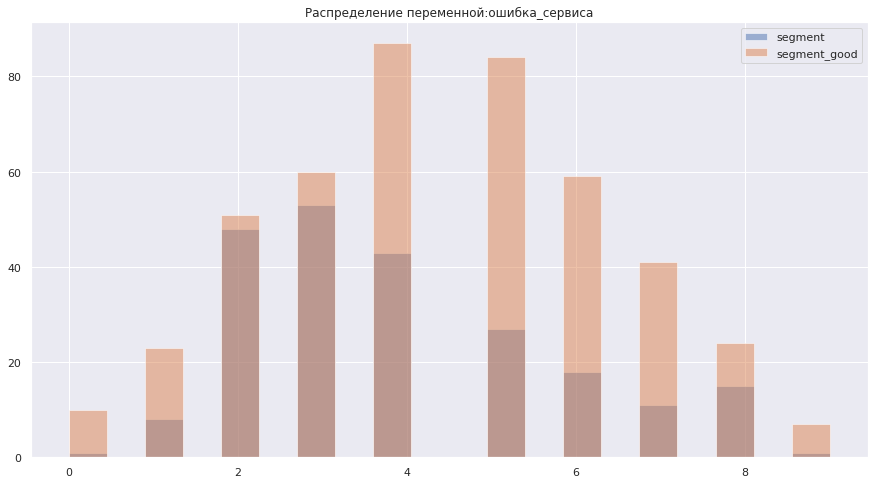

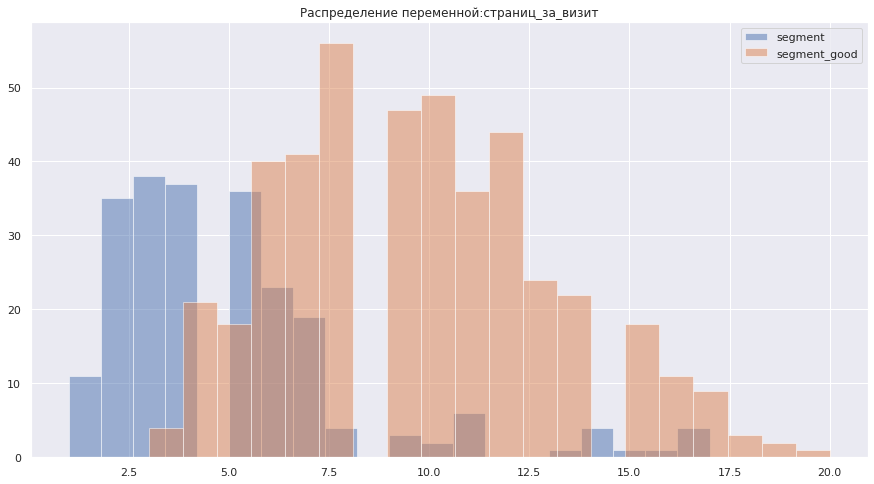

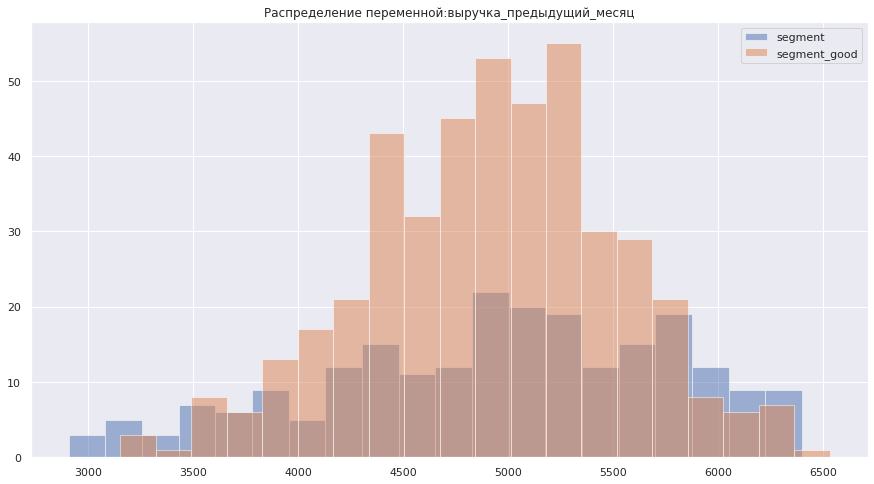

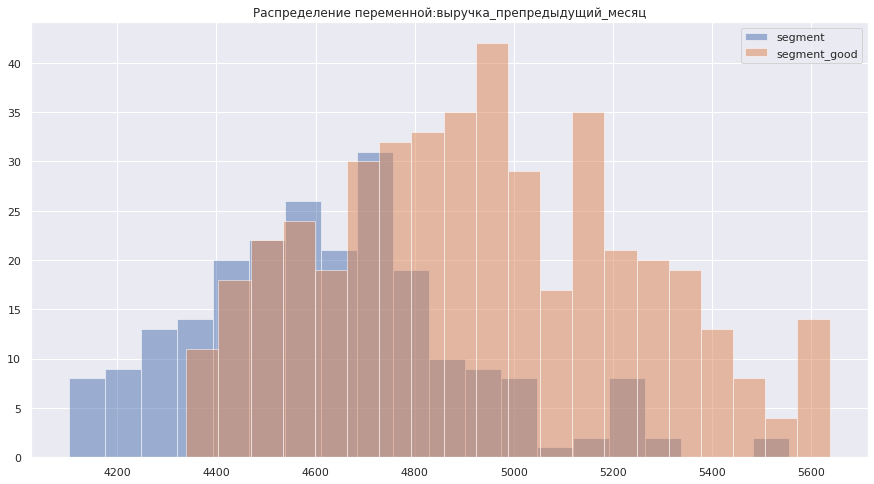

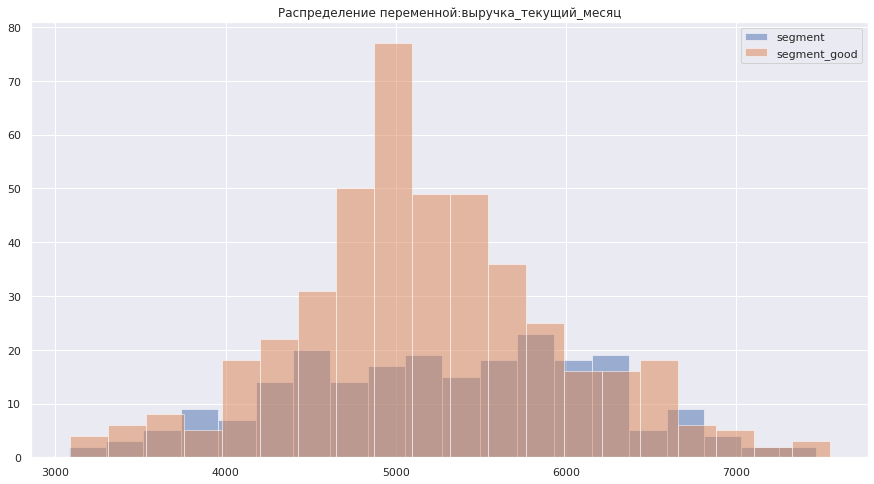

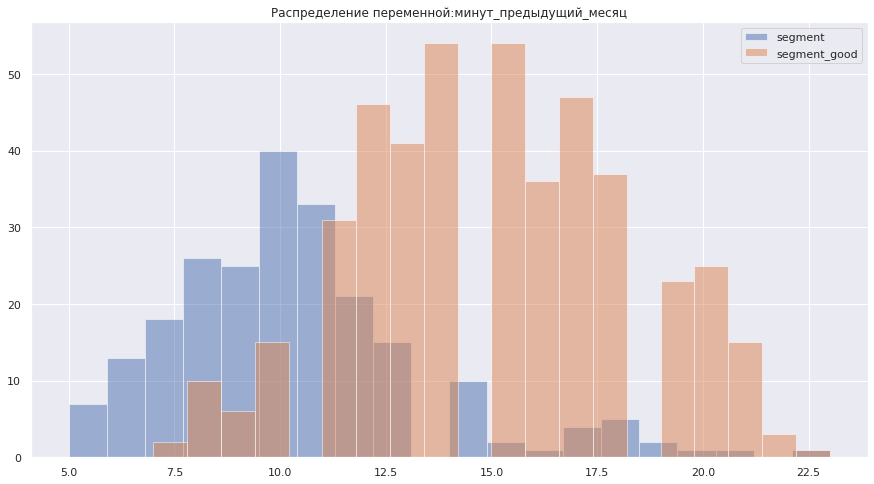

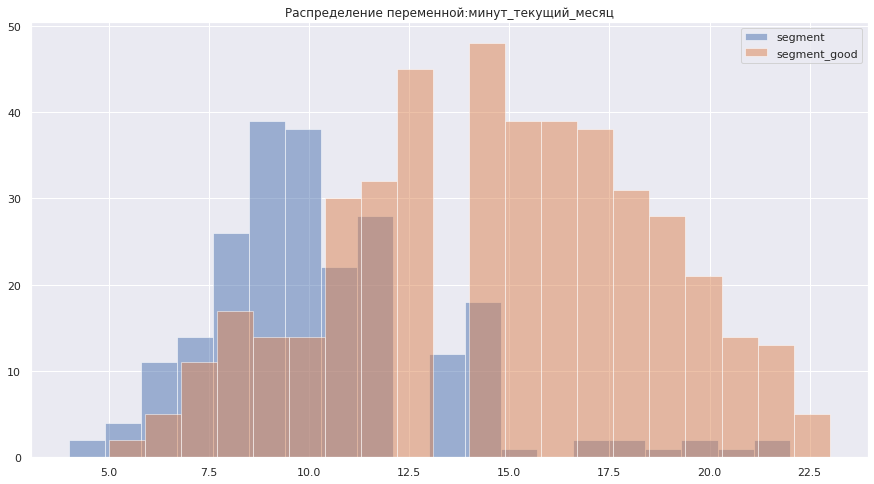

In [138]:
columns_num = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки', 
             'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
             'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 
             'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']
for variable in columns_num:
    segment[variable].hist(bins=20, alpha=0.5, label='segment')
    segment_good[variable].hist(bins=20, alpha=0.5, label='segment_good')
    plt.title(f'Распределение переменной:{variable}')
    plt.legend()
    plt.show();

In [139]:
varibels_lst = ['неоплаченные_продукты_штук_квартал', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц']
mean_segment = [segment[var].mean().round(2) for var in varibels_lst]
mean_segment_good = [segment_good[var].mean().round(2) for var in varibels_lst]
pd.DataFrame(index=varibels_lst, data={'segment':mean_segment, 'segment_good':mean_segment_good})

,segment,segment_good
неоплаченные_продукты_штук_квартал,3.91,2.27
страниц_за_визит,4.92,9.71
минут_предыдущий_месяц,10.35,14.96
минут_текущий_месяц,10.34,14.69


Судя по гистограммам segment от segment_good отличается тем, что в среднем меньше посещает страниц за сессию, и меньше проводит на сайтах в текущем и предыдущем месяцах, а так же в большем количестве неоплаченных продуктов в квартале.

Рассмотрим как распределена прибыль (в долях ед.) в категориях для разных сегментов.

In [140]:
t = pd.concat([
segment.groupby('популярная_категория').agg({'прибыль':'sum'}).round().sort_index() \
       .rename(columns={"прибыль": 'segment'}),
segment_good.groupby('популярная_категория').agg({'прибыль':'sum'}).round().sort_index() \
            .rename(columns={"прибыль": 'segment_good'})
], axis=1).reset_index()
t[['segment', 'segment_good']] = t[['segment', 'segment_good']].div(t[['segment', 'segment_good']] \
                                                               .sum(axis=0), axis=1).round(2)
t

,популярная_категория,segment,segment_good
0,Домашний текстиль,0.17,0.20
1,Косметика и аксесуары,0.23,0.17
2,Кухонная посуда,0.13,0.10
3,Мелкая бытовая техника и электроника,0.06,0.16
4,Техника для красоты и здоровья,0.08,0.14
5,Товары для детей,0.34,0.23


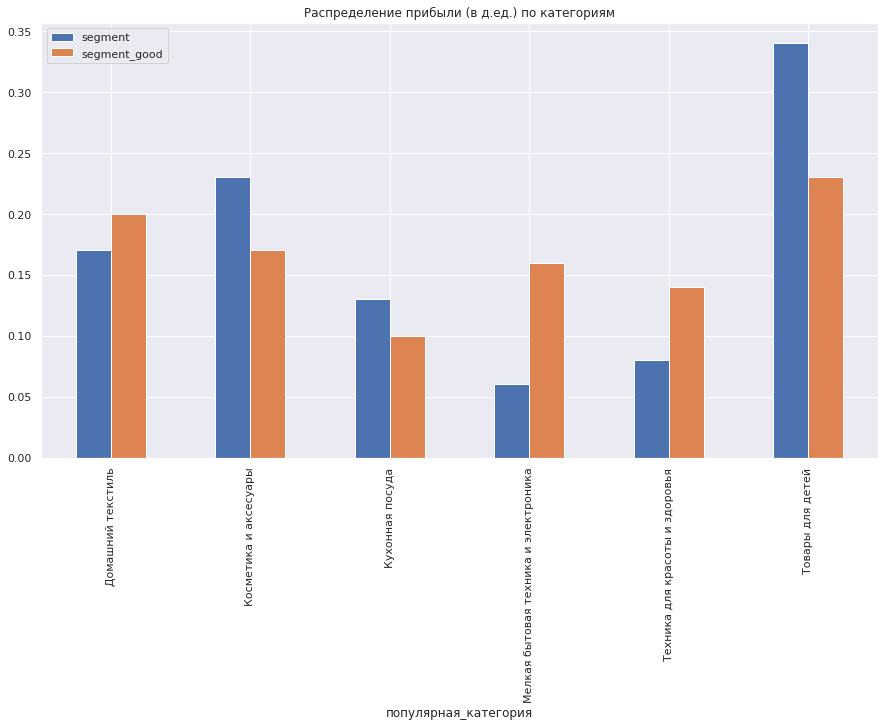

In [141]:
t.plot(kind='bar', y=['segment', 'segment_good'], x='популярная_категория')
plt.title('Распределение прибыли (в д.ед.) по категориям');

Доля прибыли у segment_good от категории **Мелкая бытовая техника и электроника** примерно в 3 раза больше, чем у segment, и в 2 раза больше от категории **Техника для красоты и здоровья**.

Для повышения продуктовой активности для segment необходимо:
1. Разработать рекомендательную систему, которая увеличит число посещений страниц сайта за сессию и увеличит продолжительность минут сессии.
2. Сделать рассылку клиентам, попадающим в segment с рекламой товаров из категории **Мелкая бытовая техника и электроника** и **Техника для красоты и здоровья**.
3. Увеличить количество напоминаний о необходимости выкупа товаров.

В шаге **Сегментация покупателей** было сделано следующее:
1. Для всех клиентов с помощью найденной модели были сделаны предсказания вероятности снижения покупательской активности.
2. К датафрейму **df** были примержаны данные о прибыли, полученной с каждого клиента (датафрейм **money**).
3. По полученным данным была построена точечная диаграмма, на основе которой все пользователи были разбиты на 4 сегмента.
Для исследования была выбран сегмент пользователей с высокой прибылью и высокой вероятностью снижения активности (семент назван **segment**), для сравнения был выбран дополнительный сегмент покупателей с высокой прибылью и низкой вероятностью снижения активности (сегмент назван **segment_good**).
4. Построены гистограммы распределения различных числовых переменных у **segment** и **segment_good**. На основании которых определено, что segment от segment_good отличается тем, что в среднем меньше посещает страниц за сессию, и меньше проводил времени на сайтах в текущем и предыдущем месяцах, а также в большем количестве имеет неоплаченных продуктов в квартале.
5. Построен барплот распределения доли прибыли в категориях у разных сегментов, и определено, что: доля прибыли у **segment_good** от категории **Мелкая бытовая техника и электроника** примерно в 3 раза больше, чем у **segment*, и в 2 раза больше от категории **Техника для красоты и здоровья**.
6. Даны рекомендации по уменьшению вероятности снижения продуктовой активности для **segment**.


## Общий вывод

1. У интернет-магазина «В один клик», который продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты, судя по последним отчетам начала снижаться активность покупателей.  Магазин планирует удерживать активность постоянных клиентов через отправку персонализированных предложений. Задача состоит в том, чтобы разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
2. Для решения задачи был выбран следующий алгоритм действий:
- на основе данных, которые представил магазин, построить модель машинного обучения предсказывающую вероятность снижения покупательской активности;
- на основе прогнозов модели и данных о прибыли от клиентов, выделить сегменты покупателей;
- для выбранного сегмента разработать персонализированные предложения для повышения покупательской активности.
3. Были загружены 4 датасета, по которым была проведена предобработка данных:
- названия столбцов приведены в стандартный вид;
- устранены неявные дубликаты;
- удалены выбросы в данных;
- в записях исправлены орфографические ошибки.
4. Проведен исследовательский анализ 4 датафреймов, в ходе которого выяснилось, что:
- целевая переменная имеет дисбаланс классов;
- часть числовых переменных имеет распределение похожее на нормальное, а часть на скошенное;
- выявлено, что примерно 400 дней назад количество регистраций новых пользователей стало снижаться;
- выявлено, что в переменной **market_time** отсутствует записи 'препредыдущий_месяц' в отличии от переменной **market_money**.
5. Проведено объедение 3 датафреймов в один **df**.  В получившемся датафрейме отсутствуют пропущенные значения и дубликаты, а также количество строк равно количеству id.
6. Между числовыми переменными проведен корреляционный анализ с помощью коэффициента корреляции Спирмена, а между категориальными и числовыми с помощью phik-корреляции. Выявлено следующее:
- определены переменные, которые хорошо коррелируют с целевой переменной;
- найдены 2 признака, которые очень сильно друг с другом коррелируют;
- определены переменные, которые плохо или вообще не коррелируют с целевой.
7. Были созданы пайплайны для тестирования моделей:
- создан пайплан для обработки данных, в котором для обработки категориальных данных предусмотрен OneHotEncoder, для категориальных порядковых - OrdinalEncoder, для числовых - StandardScaler;
- создан пайплайн для обучения модели с помощью алгоритма решающих деревьев;
- определена метрика, которая лучше всего подходит для сравнения моделей в условиях данной задачи -  recall; 
- выборка была разбита на обучающую и тестовую, при этом учитывался дисбаланс классов в целевой переменной;
- создана сетка гиперпараметров для различных моделей. В сетке использовались модели: DecisionTreeClassifier, LogisticRegression, SVC, KNeighborsClassifier;
- с помощью GridSearchCV были обучены модели по сетки при различных параметрах. Лучшей моделью оказался SVC(C=10), с метриками: recall=0.821, accuracy = 0.873.
8. На основе лучшей модели был проведен анализ важности признаков:
- с помощью библиотеки shap рассчитаны shap_values;
- построены 3 диаграммы, показывающие важность признаков: beeswarm, waterfall и bar;
- определены 9 признаков, которые максимально влияют на предсказание модели;
- заново обучена модель SVC(C=10), но уже с 9 самыми важными признаками.
9. Выполнена сегментация клиентов и даны рекомендации:
- на основе модели найдены прогнозные вероятности снижения покупательской активности:
- построена точечная диаграмма, на основе которой все пользователи были разбиты на 4 сегмента.
Для исследования была выбран сегмент пользователей с высокой прибылью и высокой вероятностью снижения активности (семент назван **segment**), для сравнения был выбран дополнительный сегмент покупателей с высокой прибылью и низкой вероятностью снижения активности (сегмент назван **segment_good**).
- построены гистограммы распределения различных числовых переменных у **segment** и **segment_good**. На основании которых определено, что segment от segment_good отличается тем, что в среднем меньше посещает страниц за сессию, и меньше проводил времени на сайтах в текущем и предыдущем месяцах, а также в большем количестве имеет неоплаченных продуктов в квартале.
- построен барплот распределения доли прибыли в категориях у разных сегментов, и определено, что: доля прибыли у **segment_good** от категории **Мелкая бытовая техника и электроника** примерно в 3 раза больше, чем у **segment*, и в 2 раза больше от категории **Техника для красоты и здоровья**.
- даны рекомендации по уменьшению вероятности снижения продуктовой активности для **segment**:

1. Разработать рекомендательную систему, которая увеличит число посещений страниц сайта за сессию и увеличит продолжительность минут сессии.
2. Сделать рассылку клиентам, попадающим в segment с рекламой товаров из категории **Мелкая бытовая техника и электроника** и **Техника для красоты и здоровья**.
3. Увеличить количество напоминаний о необходимости выкупа товаров.
